Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [180]:
NAME = "Haydee Svab"
COLLABORATORS = ""

---

# Practical assigment 1: Perceptrons

Watching the first lectures by prof. Mostafa, we have learnt about two types of perceptrons: classic and pocket. In this assignment you will implement in Python both types of perceptrons and test them against simulated and one real dataset.

Your notebook will be graded automatically so follow the instructions and do not change the name of the functions.

We begin importing some libraries.

In [181]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.mlab
import matplotlib.animation as animation
from IPython.core.pylabtools import figsize, getfigs
from IPython.display import display
from IPython.display import HTML

# This line is necessary to show the plots.
%matplotlib inline

# the line below points to the package we will use to animate the plots
# you may need to install ffmpeg via `sudo apt install ffmpeg` (ubuntu) or `brew install ffmpeg` (mac)
# then you can verify the path to ffmpeg via `which ffmpeg`
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

#plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe' #windows

In [182]:
def sign(x):
    if x >= 0:
        return 1
    return -1

We are now ready to generate a dataset. We will start with a 1D Gaussian dataset, i.e., a dataset generated using a Gaussian distribution, to get used to numpy number generator and plot function.

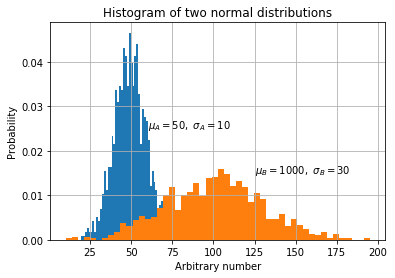

In [183]:
# Set a seed to guarantee reproducibility
np.random.seed(0)

# Set mean and standard deviation for set A
musetA = 50
sigmasetA = 10.0

# Set the number of samples
NsetA = 1000

# Generate set A (check the documentation for random.normal)
setA = np.random.normal(musetA, sigmasetA, NsetA)

# Set mean and standard deviation for set B
musetB = 100
sigmasetB = 30.0

# Set the number of samples
NsetB = 800

# Generate set B
setB = np.random.normal(musetB, sigmasetB, NsetB)

# the histogram of the data setA
nbinsA, Abins, Apatches = plt.hist(setA, normed=True, bins=50)

# the histogram of the data setB
nbinsB, Bbins, Bpatches = plt.hist(setB, normed=True, bins=50)

plt.xlabel('Arbitrary number')
plt.ylabel('Probability')
plt.title('Histogram of two normal distributions')
plt.text(60, .025, r'$\mu_A=50,\ \sigma_A=10$')
plt.text(125, .015, r'$\mu_B=1000,\ \sigma_B=30$')
plt.grid(True)
plt.show()

However, we are interested in distributions of two or more dimensions. To do that we have to set a covariance matrix first. 

We are going to start with two independent distributions.

Try to modify the parameters, mainly the covariance matrix and see what happens. Try using  equal covariances cosigmaAB = cosigmaBA != 0, then try to make them different. 

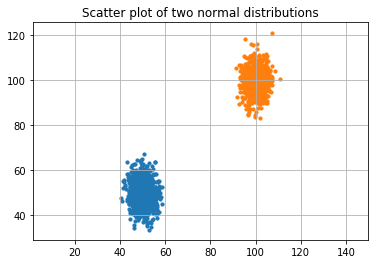

In [184]:
# Set a seed to guarantee reproducibility
np.random.seed(0)

# Set mean for set A and B
musetA = np.array([50.0,50.0])
musetB = np.array([100.0,100.0])

sigmasetA = 10.0
sigmasetB = 30.0
cosigmaAB = 0.0
cosigmaBA = 0.0

# Set covariance matrix
covAB = np.array([[ sigmasetA, cosigmaAB], 
                [cosigmaBA, sigmasetB]])

# Set the number of samples for sets A and B
NsetA = 1000
NsetB = 800

# Generate sets A and B (check the documentation for random.multivariate_normal)
setA = np.random.multivariate_normal(musetA, covAB, NsetA)
setB = np.random.multivariate_normal(musetB, covAB, NsetB)

plt.scatter(setA[:,0], setA[:,1], s=10, cmap='blue')
plt.scatter(setB[:,0], setB[:,1], s=10, cmap='orange')

plt.title('Scatter plot of two normal distributions')
plt.grid(True)
plt.axis('equal')
plt.show()

We know now how to generate 2D clouds. Now we must learn how to generate a labeled dataset. To do that, first we join the two sets of points and then we add the labels (-1 and 1 in this case).

/home/haydee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: covariance is not symmetric positive-semidefinite.
/home/haydee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: covariance is not symmetric positive-semidefinite.


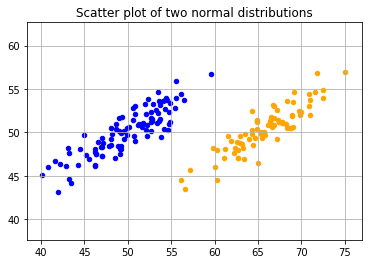

(180, 2) (180,) (180, 3)
[[ 1.         42.8653987  46.10164681]
 [ 1.         44.88842781 49.70289938]
 [ 1.         43.24694006 44.57821934]
 [ 1.         46.36697468 47.56135642]
 [ 1.         50.16956626 50.62920604]]


In [185]:
# Set a seed to guarantee reproducibility
np.random.seed(0)

# Set mean for set A and B
musetA = np.array([50.0,50.0])
musetB = np.array([65.0,50.0])

sigmasetA = 10.0
sigmasetB = 10.0
cosigmaAB = 5.0
cosigmaBA = 15.0

# Set covariance matrix
covAB = np.array([[sigmasetA, cosigmaAB], 
                [cosigmaBA, sigmasetB]])

# Set the number of samples for sets A and B
NsetA = 100
NsetB = 80

# Generate sets A and B (check the documentation for random.multivariate_normal)
setA = np.random.multivariate_normal(musetA, covAB, NsetA)
setB = np.random.multivariate_normal(musetB, covAB, NsetB)

plt.scatter(setA[:,0], setA[:,1], s=20, c='blue')
plt.scatter(setB[:,0], setB[:,1], s=20, c='orange')

plt.title('Scatter plot of two normal distributions')
plt.grid(True)
plt.axis('equal')
plt.show()

# Join the datasets A and B (check the documentation for append)
datasetAB = np.append(setA,setB,axis=0)
NsetAB = NsetA + NsetB

# Generate labels
labelsAB = np.array([-1.0]*NsetA + [1.0]*NsetB)

# Insert x_0 = 1 for all points
datasetABx0 = np.insert(datasetAB, 0, [1.0]*NsetAB, axis=1) 

# Check dataset dimensions
print(datasetAB.shape,labelsAB.shape,datasetABx0.shape)

# Check if things worked OK
print(datasetABx0[:5,])

Finally, the assignment...

First, you are going to implement the classic perceptron. To do that, use the signature definition below.

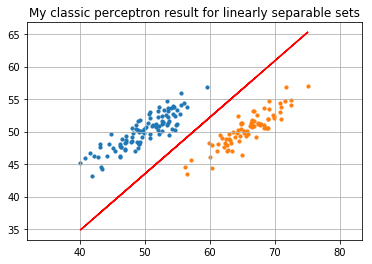

In [187]:
def ClassicPerceptron(W,X,Y,maxiter=1000,reorder=True):
    """ClassicPerceptron function implements the most basic perceptron. 

    This algorithm starts by reordering the training samples and their labels
    if reorder is equal to True. Then, it iterates for all the samples, as many
    times as it takes, to correctly classify all the samples, or until the number 
    of iterations reaches maxiter.

    Parameters
    ----------
    W : numpy array of floats
        The initial set of weights for the perceptron classificator.
    X : numpy array of floats
        The dataset with the bias (first column is equal to 1.0).
    Y : numpy array of floats
        The labels (-1.0, ou 1.0) for each line of X.
    maxiter : integer
        The maximum number of iterations allowed before stopping.
    reorder : boolean
        reorder the training samples and their labels.

    Returns
    -------
    WCP : list of numpy array of floats
         All the weights of the perceptron classifier computed by the 
         algorithm. We need all of them to generate a movie later. 
         
    """

    # Sets the random seed to guarantee reproducibility.
    np.random.seed(34191)
    
    # Shuffles both X and Y in the same order
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X[randomize]
    Y = Y[randomize]
    
    # MY CODE BEGINS HERE
    return estimate_WCP(W, X, Y, maxiter) 


# MY FUNCTIONS

## This function estimates WCP
def estimate_WCP(W, X, Y, maxiter):

    # Sets ths initial values os variabels
    WCP = [W]
    niter = 1
    index = 0
    classification_ok = 0
    dataset_size = len(X)

    while not convergence(classification_ok, dataset_size) and niter < maxiter:
        x = X[index]
        y = Y[index]

        x_accordingly_classified = classification(WCP, x, y)

        if not x_accordingly_classified:
            update(WCP, x, y)
            classification_ok = 0
            niter += 1
            
        classification_ok += 1            
        index = (index + 1) % dataset_size  # assures that the max_index <= dataset_size              
    
    return WCP
    
# Verifies convergency
def convergence(classification_ok, dataset_size):
    return classification_ok == dataset_size

# Verifies classification
def classification(WCP, x, y):
    h = sign(np.dot(WCP[-1], x))
    return h == y

def classification(WCP, x, y):
    return sign(np.dot(WCP[-1], x)) == y

# Sign function
def sign(value):
    if value >= 0:
        return 1
    else:
        return -1

# Updates WCP 
def update(WCP, x, y):
    W_to_sum = np.copy(WCP[-1])
    W_to_sum = np.add(W_to_sum, np.dot(y, x))    
    WCP.append(W_to_sum)

    
# Initial guess on w
w = np.array([0.0, 0.0, 0.0])

# Classic Perpectron call
w_classic = ClassicPerceptron(w, datasetABx0, labelsAB)

# The plot
plt.title('My classic perceptron result for linearly separable sets')
plt.scatter(setA[:,0], setA[:,1], s=10, cmap='blue')
plt.scatter(setB[:,0], setB[:,1], s=10, cmap='orange')
plt.grid(True)
plt.axis('equal')

# The linear equation: Y = (-W1/W2) * x + (-W0/W2)
x_line = datasetAB[:,0]
y_line = -1 * (w_classic[-1][1] / w_classic[-1][2]) * x_line - (w_classic[-1][0] / w_classic[-1][2])
plt.plot(x_line, y_line, color='red')

# MY CODE ENDS HERE

In [188]:
w = np.array([0.0, 0.0, 0.0])
w_classic = ClassicPerceptron(w, datasetABx0, labelsAB)

w_classic[-1]

array([ -2.        ,  73.07640108, -84.01278656])

In [189]:
assert len(w_classic) == 23
assert w_classic[-1][0] == -2
assert np.round(w_classic[-1][1]) == 73.0
assert np.round(w_classic[-1][2]) == -84.0

Now, you are going to implement the pocket perceptron. To do that, use the signature definition bellow.

In [190]:
def PocketPerceptron(W,X,Y,maxiter=1000):
    """PocketPerceptron function implements the pocket perceptron. 

    This algorithm starts by checking if all training samples are correctly classified.
    If some are not, choose one sample not correctly classified and adjust W. Then it 
    will repeat the above procedure until all samples are correctly classified, or until 
    the number of iterations reaches maxiter.

    Parameters
    ----------
    W : numpy array of floats
        The initial set of weights for the perceptron classificator.
    X : numpy array of floats
        The dataset with the bias (first column is equal to 1.0).
    Y : numpy array of floats
        The labels (-1.0, ou 1.0) for each line of X.
    maxiter : integer
        The maximum number of iterations allowed before stopping.

    Returns
    -------
    A tuple (WPP, WPP_best)
    WPP : list of numpy array of floats
         All the weights of the perceptron classifier computed by the 
         algorithm. We need all of them to generate a movie later.
    WPP_best : numpy array of floats
        Array of weights found in the iteration with the least misclassifications.
        If the dataset is linearly separable and maxiter is large enough, WPP_best = WPP[-1]
    
    """

    # Sets the random seed to guarantee reproducibility.
    np.random.seed(34191)
    
    # shuffles both X and Y in the same order
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X[randomize]
    Y = Y[randomize]
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [191]:
w_pocket, w_pocket_best = PocketPerceptron(w, datasetABx0, labelsAB)

print(w_pocket_best)
w_pocket

NotImplementedError: 

In [ ]:
assert len(w_pocket) == 23
assert w_pocket[-1][0] == -2
assert np.round(w_pocket[-1][1]) == 73.0
assert np.round(w_pocket[-1][2]) == -84.0
assert np.array_equal(w_pocket[-1], w_pocket_best)

Finally, generate an animation using the functions bellow to show how the weight vector varies with each iteration.

In [ ]:
def PerceptronLine(datasetAB,labelsAB,ax, w, t, total_frames=None):
    # Function developed by A. Freitas adapted to MAC5832-2019 by R. Hirata, C. Rodrigues and A. Martinazzo
    """PerceptronLine function draws a line 
    
    Parameters
    ----------
    datasetAB : The dataset points
    labelsAB : The labels for each point
    ax : numpy array of floats
        The initial set of weights for the perceptron classificator.
    w : numpy array of floats
        The weights of the perceptron line.
    t : integer
        Timestep

    """
    
    if total_frames is None:
        alpha = 1
    else:
        alpha = t/total_frames
    
    ax.set_title("Perceptron Learning Algorithm $(t=%d)$" % t)
    ax.scatter(datasetAB[:,0], datasetAB[:,1], s=20, c=labelsAB)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 3)
    y = -(w[1]/w[2])*x - w[0]/w[2]
    ax.plot(x, y, 'k-', linewidth=1, alpha=alpha)

    
def animate(frame_num):
    ax.clear()
    ax.set_xlim(-20,80)
    ax.set_ylim(-20,80)
    np.random.seed(17)
    
    PerceptronLine(datasetAB, labelsAB, ax, smaller_w[frame_num], frame_num)
    
def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim.to_html5_video())

The example bellow shows how to use the functions to animate the classic perceptron. 

In [ ]:
smaller_w = np.copy(w_classic)

fig, ax = plt.subplots(1, 1)
ax.set_xlim(-20,80)
ax.set_ylim(-20,80)
ani = animation.FuncAnimation(fig, animate, frames=len(smaller_w), blit=False, interval=200, repeat=False)
display_animation(ani)

Try to implement the animation yourself for the pocket perceptron.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()